## **Importing Pacakges**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
import warnings
from statistics import mean 
warnings.filterwarnings('ignore')

### **My Regression Function ALgorithm**

Steps:
1. Scaling and Regularization
2. Spliiting the data input and target variables
3. Calculating the coeffecients using the cross validation
4. Selection of the best model
5. Apply the selected model to Test Dataset

In [2]:
def regression(X_train, X_test, noutputs):
    #scaling X_train
    for col in X_train.columns:
        X_train[col] = (X_train[col]-X_train[col].mean())/X_train[col].std() 
        X_train[col] = np.exp(-(X_train[col]-X_train[col].mean())**2/
                              (2*(X_train[col].std())**2)) 
    
    #scaling X_test
    for col in X_test.columns: 
        X_test[col] = (X_test[col]-X_test[col].mean())/X_test[col].std() 
        X_test[col] = np.exp(-(X_test[col]-X_test[col].mean())**2/
                             (2*(X_test[col].std())**2)) 
        
    values = X_train.values
    xval=[]
    yval = []

    for i in range(values.shape[0]):
        xval.append((values[i][:-noutputs]).tolist()) 
        yval.append((values[i][-noutputs:]).tolist()) 
    

    xval = np.asarray(xval)
    yval = np.asarray(yval)
    poly = PolynomialFeatures(1)
    poly_xtrain = poly.fit_transform(xval)
    poly_xtest = pd.DataFrame(poly.transform(X_test))
    
    
    ones = np.ones(len(xval)).reshape(-1,1)
    xval= np.concatenate((ones,xval), axis=1) 
    X_test.insert(0,'ones',np.ones(len(X_test)).reshape(-1,1)) 
    

    nsplits = 5
    if len(X_train)<nsplits:
        nsplits = 2
    else:
        nsplits = 5
    
    xsplits = np.array_split(xval,nsplits) 
    ysplits = np.array_split(yval, nsplits) 
    poly_xsplits = np.array_split(poly_xtrain, nsplits) 
    
    predictions=[]
    for outputs in range(noutputs):
        final_coeff =[]
        final_coeff_poly=[]
        mse = []
        mse_poly = []
        for split in range(nsplits):
            xtrain = xsplits.copy()
            xtrain_polysplits = poly_xsplits.copy()
            
            ytrain = ysplits.copy()
            val_x = xsplits[split] 
            val_polyx = xtrain_polysplits[split]
            
            val_y = ysplits[split][:,outputs] 
        
            del xtrain[split]
            del xtrain_polysplits[split]
            del ytrain[split] 
            

            xtrain = np.concatenate(xtrain, axis=0) 
            xtrain_polysplits = np.concatenate(xtrain_polysplits,axis=0)
            
            ytrain = np.concatenate(ytrain, axis=0)
            ytrain = ytrain[:,outputs]
            
            transp = np.transpose(xtrain)
            transp_poly = np.transpose(xtrain_polysplits)
            
            
            coeff = np.linalg.pinv(xtrain.transpose().dot(xtrain)).dot(xtrain.transpose()).dot(ytrain)
            final_coeff.append(coeff.tolist())

            coeffpoly = np.linalg.pinv(xtrain_polysplits.transpose()
                                      .dot(xtrain_polysplits)).dot(xtrain_polysplits.transpose()).dot(ytrain)
            final_coeff_poly.append(coeffpoly.tolist())
            
            ypred = val_x.dot(coeff) 
            ypred_poly = val_polyx.dot(coeffpoly) 
            
            
            meansquare = ((ypred-val_y)**2).sum()/len(ypred)
            
            meansquare_poly = ((ypred_poly-val_y)**2).sum()/len(ypred_poly)
            
            mse.append(meansquare) 
            mse_poly.append(meansquare_poly)
            
        
         
        mincoeff = final_coeff[mse.index(min(mse))]
        
        mincoeff_poly = final_coeff_poly[mse_poly.index(min(mse_poly))]
        
                
        train_pred = xval.dot(mincoeff)
        train_pred_poly = poly_xtrain.dot(mincoeff_poly)
        
        
        meansquare = ((train_pred-yval[:,outputs])**2).sum()/len(train_pred) 
        meansquare_poly = ((train_pred_poly-yval[:,outputs])**2).sum()/len(train_pred_poly)
        
        if meansquare>meansquare_poly:
            predictions.append(poly_xtest.to_numpy().dot(mincoeff_poly).tolist())
        else:
            predictions.append(X_test.to_numpy().dot(mincoeff).tolist())
        
    
        
    return predictions

## Regression of One Dimensional Data Set
y=cos(x^2)+0.1x^3+Epls, x in interval [-5,5]

In [3]:
x=np.arange(-5,5.1,0.1).tolist()
x=[round(elem,2) for elem in x]
df=pd.DataFrame(x)
mandata=pd.DataFrame()
noise=pd.DataFrame()

for l in [0,0.1,0.2,0.5,1]:
    u=[]
    for i in x:
        u.append(np.cos(i**2)+(0.1*(i**3))+np.random.normal(0,l)) 
    noise[l]=u

mandata=pd.concat([df,noise],ignore_index=True,axis=1, sort=False)
mandata.columns=['X','Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
mandata.head()

,X,Y_0_GNOISE,Y_0.1_GNOISE,Y_0.2_GNOISE,Y_0.5_GNOISE,Y_1_GNOISE
0,-5.0,-11.508797,-11.422052,-11.754228,-11.184819,-11.991627
1,-4.9,-11.331687,-11.414059,-11.584441,-11.701329,-11.059515
2,-4.8,-11.557767,-11.660771,-11.344149,-12.033728,-11.317771
3,-4.7,-11.377418,-11.250252,-11.383553,-12.270295,-10.042720
4,-4.6,-10.407628,-10.369273,-10.549996,-9.638798,-9.074167


## Predicting the values of 1-D equation

In [4]:
predictions=pd.DataFrame()

for i in range(1,6):
    df1 = mandata.iloc [:, [0,i]]
    
    X_train = df1.iloc[:math.floor((df1.shape[0]*0.8)),:]
    X_test = df1.iloc[math.ceil((df1.shape[0]*0.8)):,:-1].reset_index(drop=True)
    y_test = df1.iloc[math.ceil((df1.shape[0]*0.8)):,-1:]
    pred=regression(X_train, X_test, 1)
    predictions[i] = pred[0]

data_prediction=pd.concat([X_test,predictions],ignore_index=True,axis=1, sort=False)
data_prediction.columns=['l','X','Y_pred_0_GNOISE','Y_pred_0.1_GNOISE','Y_pred_0.2_GNOISE',
                         'Y_pred_0.5_GNOISE','Y_pred_1_GNOISE']
del data_prediction['l']
data_prediction.head()

,X,Y_pred_0_GNOISE,Y_pred_0.1_GNOISE,Y_pred_0.2_GNOISE,Y_pred_0.5_GNOISE,Y_pred_1_GNOISE
0,0.275467,0.442543,0.442647,0.445541,0.453834,0.471445
1,0.356243,0.505104,0.505467,0.507820,0.505907,0.524208
2,0.447727,0.575959,0.576615,0.578357,0.564882,0.583967
3,0.546855,0.652735,0.653708,0.654786,0.628786,0.648719
4,0.649117,0.731937,0.733238,0.733632,0.694709,0.715517


Text(0.5, 1.0, 'X VS Y')

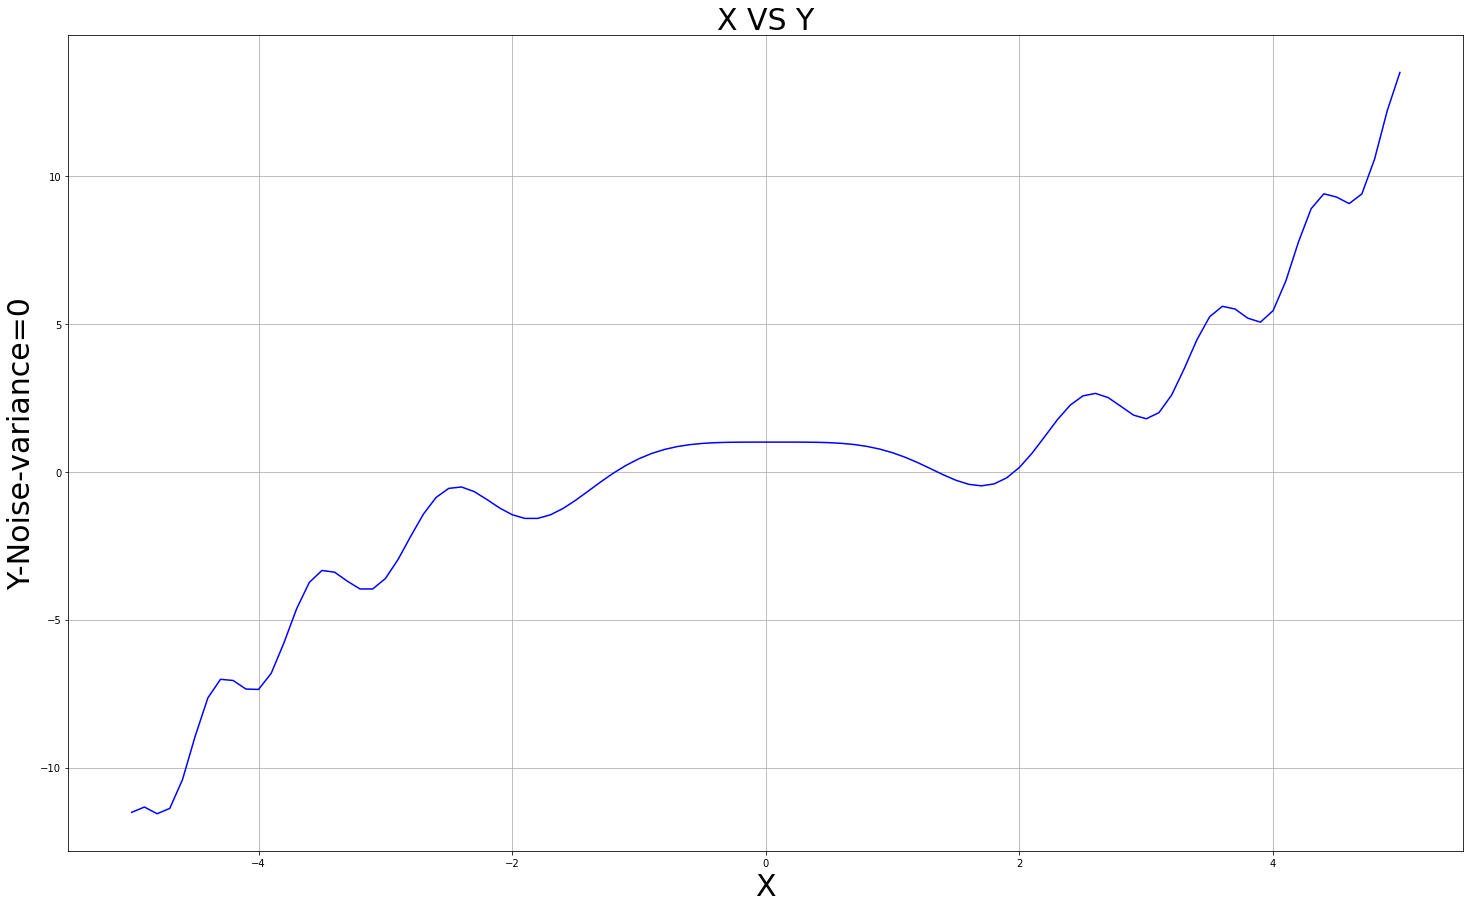

In [5]:
from pylab import rcParams

rcParams['figure.figsize'] = 25, 15
plt.grid()

plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

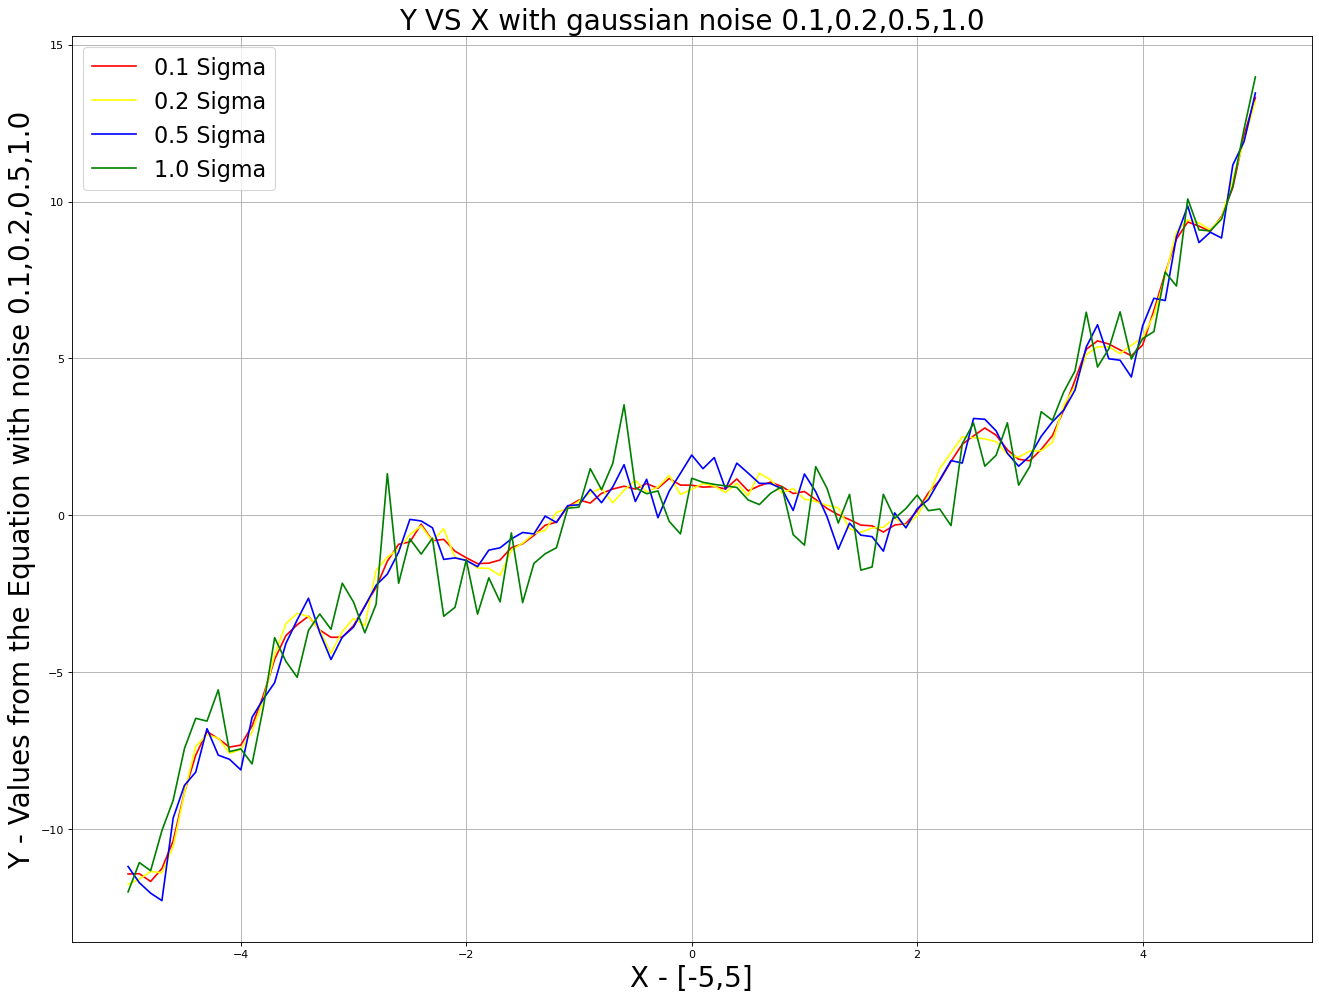

In [6]:
plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
params = {'legend.fontsize': 20,'legend.handlelength': 2}
plt.rcParams.update(params)
plt.grid()

plt.plot(mandata['X'], mandata['Y_0.1_GNOISE'],color='red',label='0.1 Sigma')
plt.plot(mandata['X'], mandata['Y_0.2_GNOISE'],color='yellow',label='0.2 Sigma')
plt.plot(mandata['X'], mandata['Y_0.5_GNOISE'],color='blue',label='0.5 Sigma')
plt.plot(mandata['X'], mandata['Y_1_GNOISE'],color='green',label='1.0 Sigma')
plt.ylabel('Y - Values from the Equation with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.xlabel('X - [-5,5]',fontsize=25)
plt.title('Y VS X with gaussian noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.legend()
plt.show()

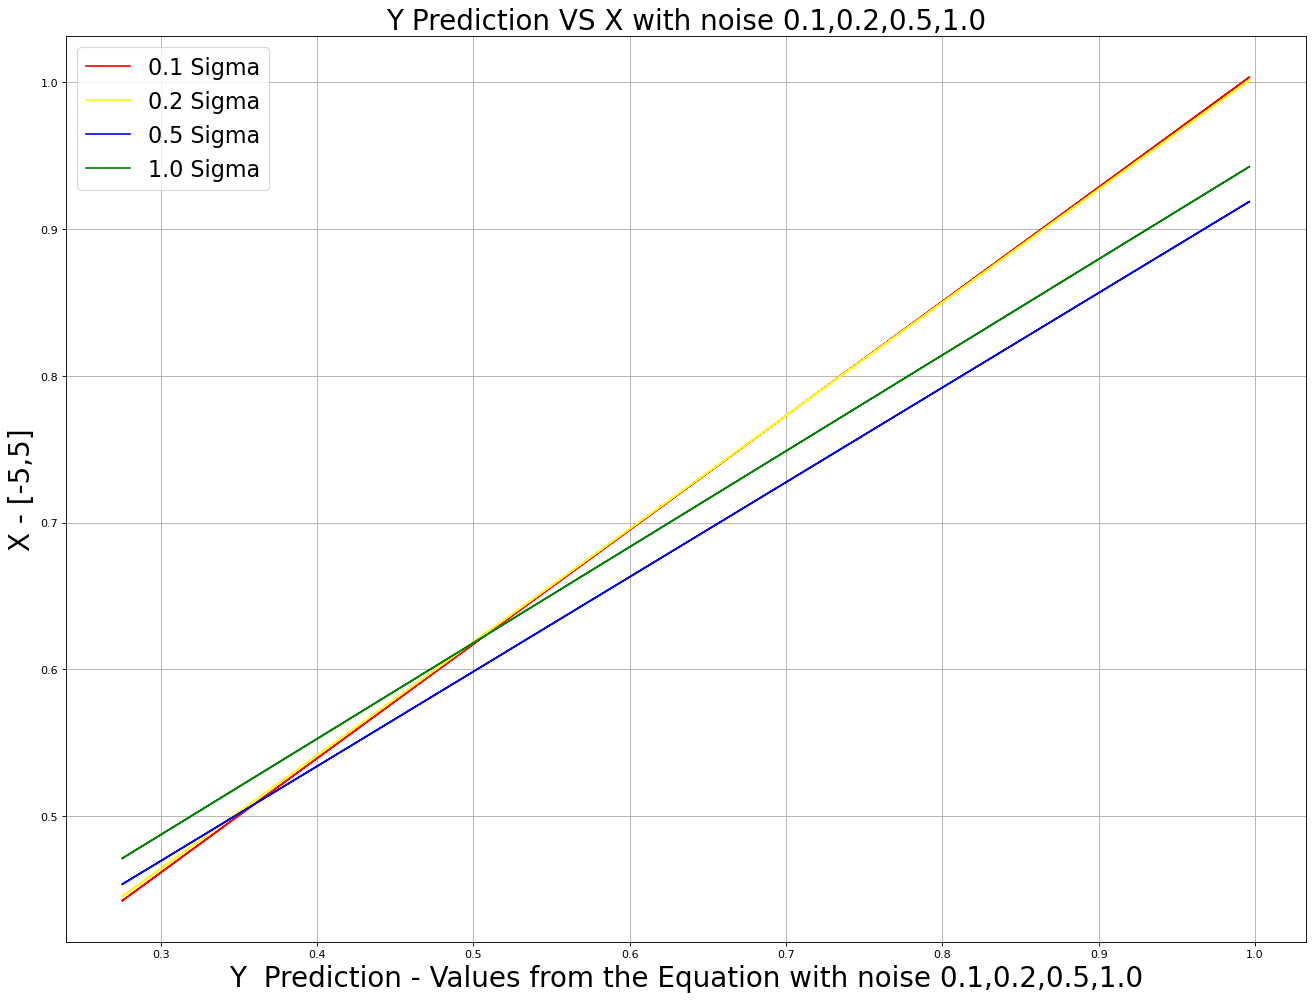

In [7]:
plt.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
params = {'legend.fontsize': 20,'legend.handlelength': 2}
plt.rcParams.update(params)
plt.grid()

plt.plot(data_prediction['X'], data_prediction['Y_pred_0.1_GNOISE'],color='red',label='0.1 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_0.2_GNOISE'],color='yellow',label='0.2 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_0.5_GNOISE'],color='blue',label='0.5 Sigma')
plt.plot(data_prediction['X'], data_prediction['Y_pred_1_GNOISE'],color='green',label='1.0 Sigma')
plt.xlabel('Y  Prediction - Values from the Equation with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.ylabel('X - [-5,5]',fontsize=25)
plt.title('Y Prediction VS X with noise 0.1,0.2,0.5,1.0',fontsize=25)
plt.legend()
plt.show()

### 5 Fold Cross Validation for 2, 5, 10, 20, 50, 100, 200, 500 data points.

In [8]:
x=np.arange(-5,5,10/1000).tolist()
x=[round(elem,2) for elem in x]
df=pd.DataFrame(x)
df2=pd.DataFrame()
noise=pd.DataFrame()

for l in [0,0.1,0.2,0.5,1]:
    u=[]
    for i in x:
        u.append(np.cos(i**2)+(0.1*(i**3))+np.random.normal(0,l)) 
    noise[l]=u

df2=pd.concat([df,noise],ignore_index=True,axis=1, sort=False)

df2.columns=['X','Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
df2.head()

,X,Y_0_GNOISE,Y_0.1_GNOISE,Y_0.2_GNOISE,Y_0.5_GNOISE,Y_1_GNOISE
0,-5.00,-11.508797,-11.673475,-11.662768,-10.854391,-10.495408
1,-4.99,-11.452089,-11.345894,-11.460573,-12.404981,-10.884507
2,-4.98,-11.405318,-11.388980,-11.654822,-11.615123,-10.506346
3,-4.97,-11.368151,-11.443939,-11.077197,-11.669637,-10.483813
4,-4.96,-11.340164,-11.279384,-11.737829,-11.508759,-11.210177


In [9]:
MSE=pd.DataFrame()
xtest=[]
my_predictions = []
mymse = []
for i in range(1,6):
    mse=[]
    df1 = df2.iloc[:, [0,i]]
    for j in ([2,5,10,20,50,100,200,500]):
        X_train = df1.sample(n = j)
        X_test = df1.sample(n= len(df1)-j).iloc[:,:-1].reset_index(drop=True)
        
        y_test = df1.sample(n= len(df1)-j).iloc[:,-1:].reset_index(drop=True).to_numpy()
        y_test = (y_test-y_test.mean())/y_test.std()
        y_test = np.exp(-(y_test-y_test.mean())**2/(2*(y_test.std())**2)) 
        xtest.append(X_test.to_numpy())
        
        pred=regression(X_train, X_test, 1)
        
        my_predictions.append(pred)
        me=((pred-y_test)**2).sum()/len(pred)
        mymse.append(me)
        mse.append(me)
    MSE[i]=mse

MSE.columns=['Y_0_GNOISE','Y_0.1_GNOISE','Y_0.2_GNOISE','Y_0.5_GNOISE','Y_1_GNOISE']
MSE.index=[2,5,10,20,50,100,200,500]

ind_worst = np.asarray(mymse).argsort()[-2:][::-1]
ind_best = np.asarray(mymse).argsort()[:2][::1]
worst_prediction = [np.asarray(my_predictions[i][0]) for i in ind_worst]
worst_test = [xtest[i].flatten() for i in ind_worst]
best_prediction = [np.asarray(my_predictions[i][0]) for i in ind_best]
best_test = [xtest[i].flatten() for i in ind_best]
print(MSE)

        Y_0_GNOISE   Y_0.1_GNOISE   Y_0.2_GNOISE   Y_0.5_GNOISE     Y_1_GNOISE
2    111418.655809  111436.506856  111408.611574  109977.389105  105163.172813
5    208769.051690  195409.417450  198839.983804  176879.846617  134515.097428
10   170264.971127  154009.999492  178422.076736  175331.027805  149990.411390
20   152243.887986  186788.615713  169243.371932  163736.126046  182721.207915
50   162592.924162  168072.618581  169524.390497  161023.389751  143961.235986
100  146437.204846  144744.710427  154332.066290  155793.365282  136022.515133
200  124834.681351  119810.360840  123321.304282  116820.810358  105989.567345
500   47687.053422   46131.215979   46122.678255   43591.159776   42062.471336


### Plotting the two Best Predictions on the true graph with guasssian variance=0

Text(0.5, 1.0, 'X VS Y')

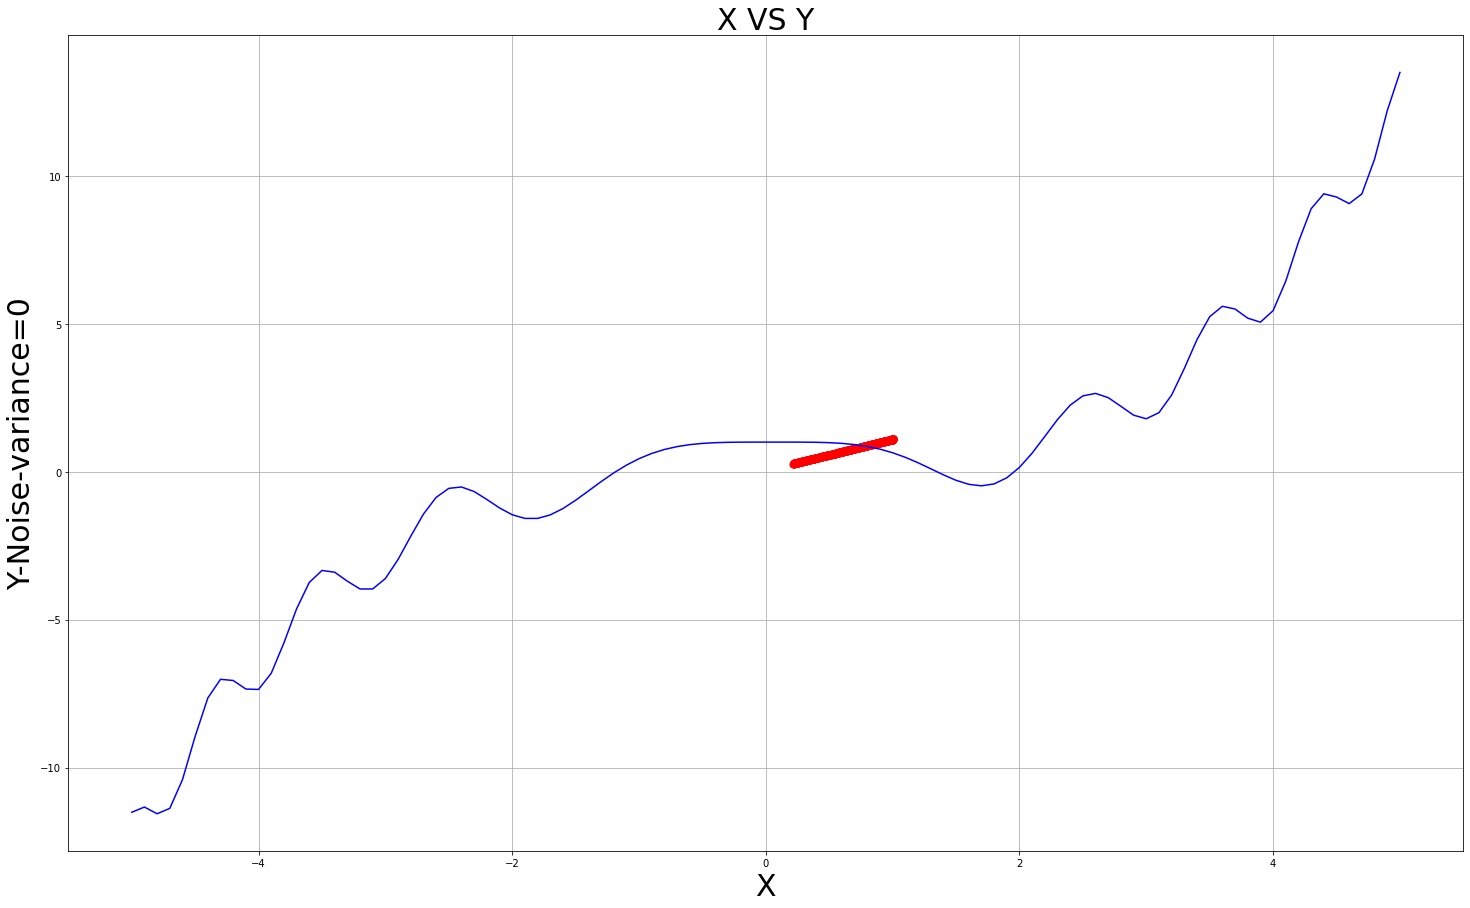

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.scatter(best_test[0],best_prediction[0],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### Second best plot on the true line with gaussian variance zero

Text(0.5, 1.0, 'X VS Y')

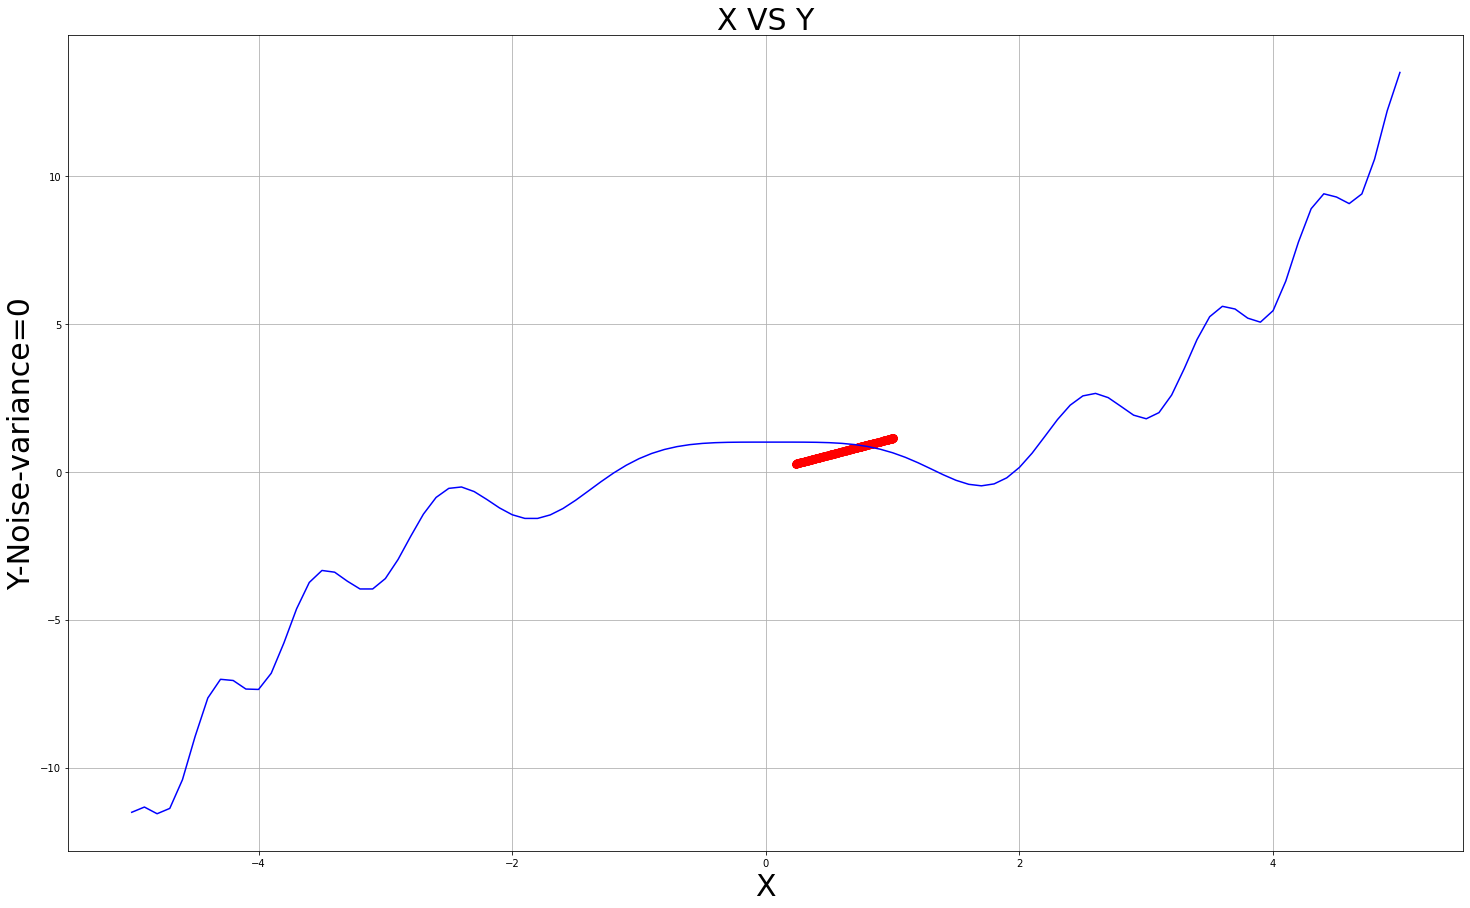

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')

plt.scatter(best_test[1],best_prediction[1],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### PLotting the two worst predictions on the True graph

Text(0.5, 1.0, 'X VS Y')

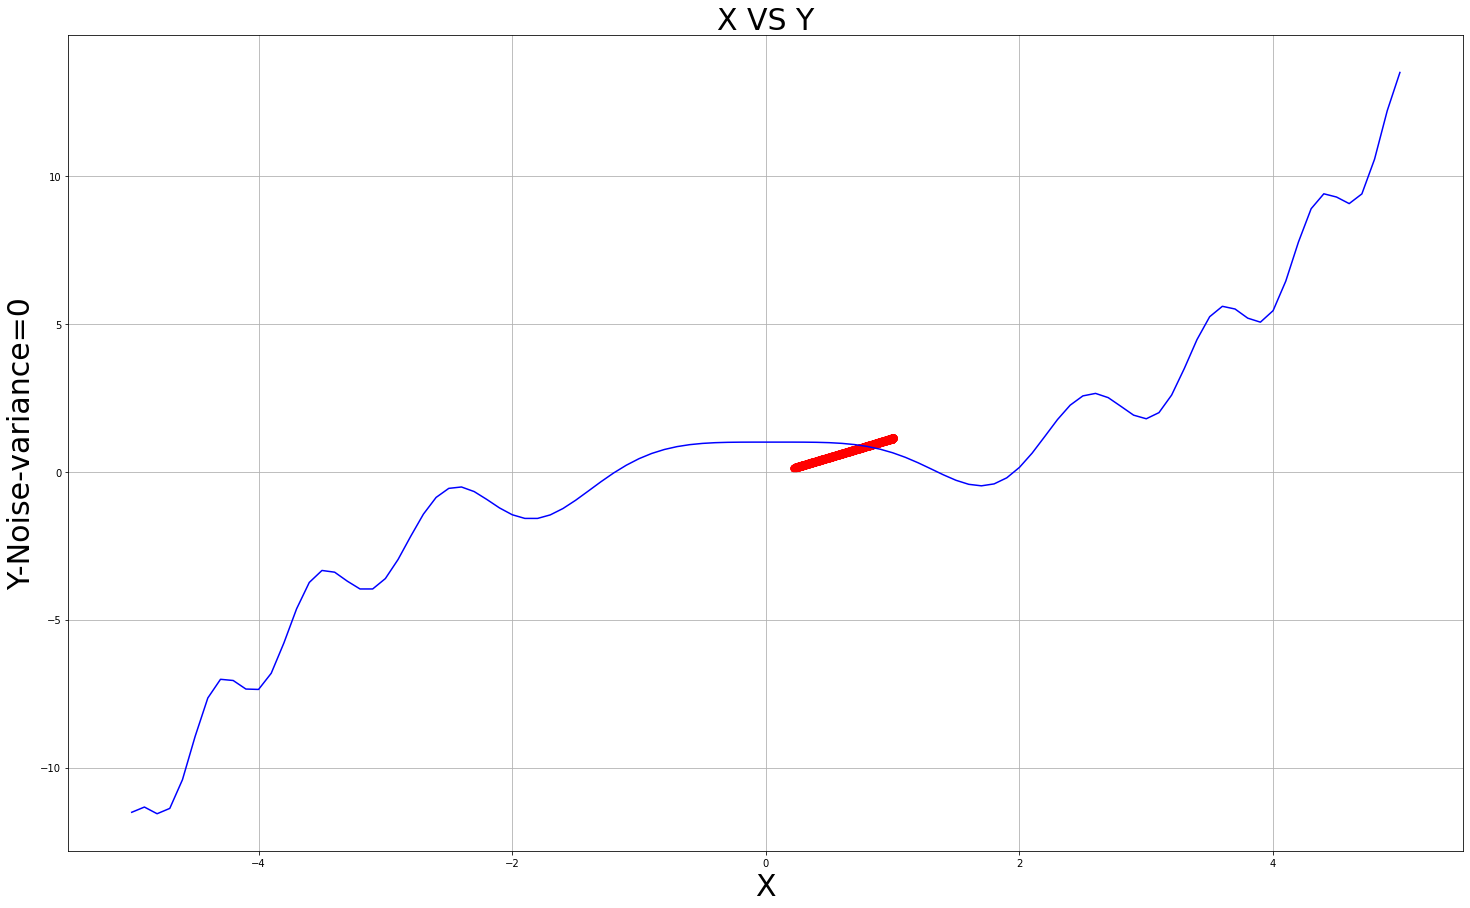

In [12]:
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
# Scatter plot of Worst prediciton value.
plt.scatter(worst_test[0],worst_prediction[0],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

### Second worst Prediction

Text(0.5, 1.0, 'X VS Y')

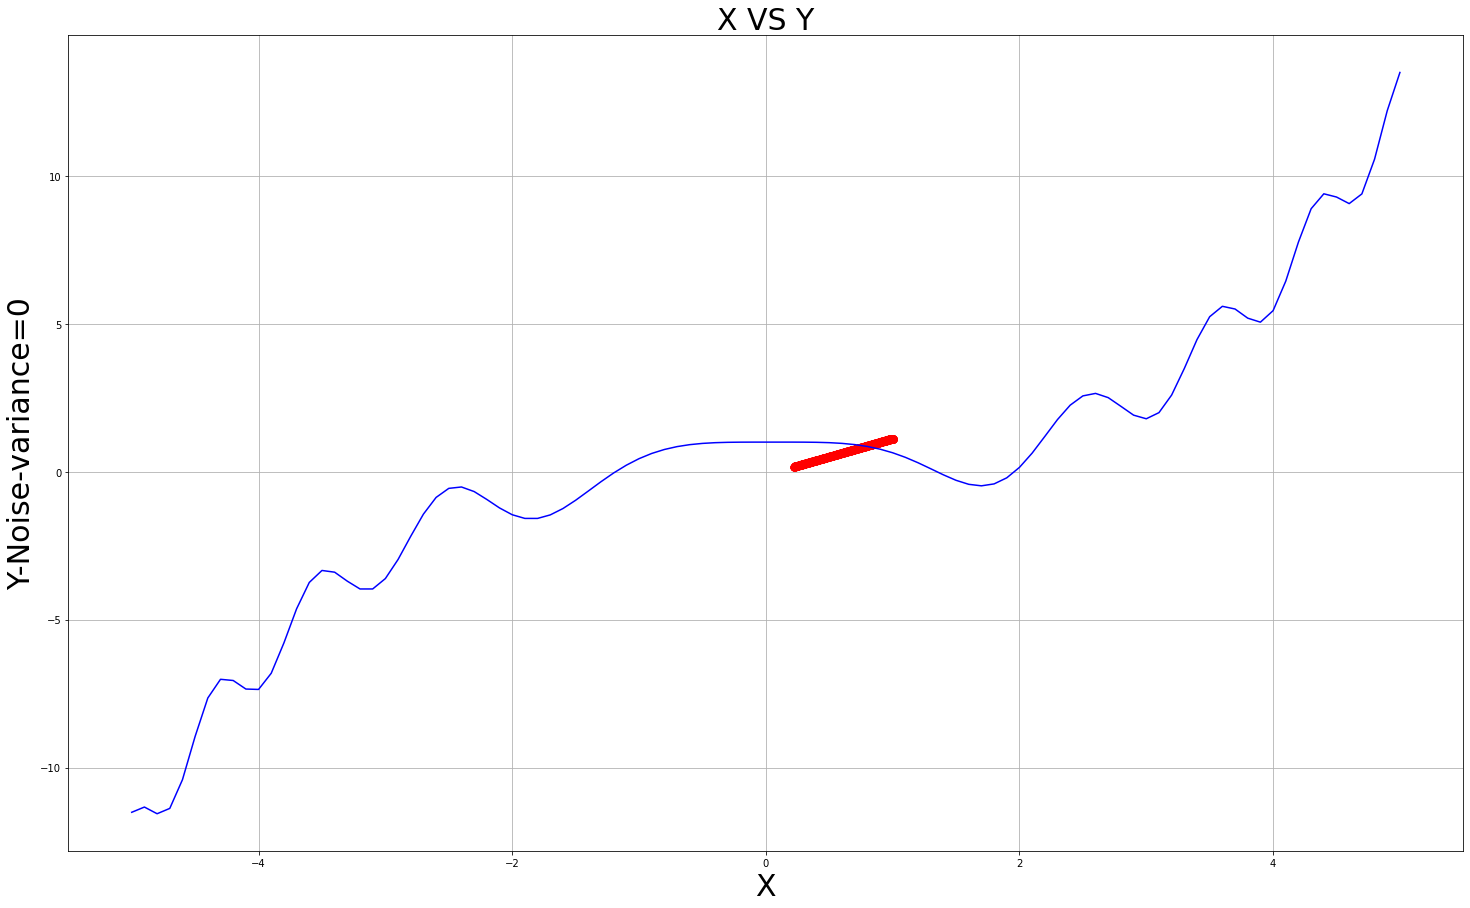

In [13]:
plt.grid()
plt.plot(mandata['X'],mandata['Y_0_GNOISE'],color='blue')
plt.scatter(worst_test[1],worst_prediction[1],color='red',marker='o',s=50)
plt.xlabel('X',fontsize=30)
plt.ylabel('Y-Noise-variance=0',fontsize=30)
plt.title('X VS Y',fontsize=30)

## Result 
The Results obtained from the data generated through the 1-d equation given, the results obtained were fairly good with higher Mean Squared Error vlaues.

### Observation
1. The standard deviation of the data set is decresed to significant amount after scaling and guassian regularization.
2. The addition of noise to the dataset decreases the accuracy of the prediction.
3. Polynomial regression did not provide better results.
4. The simple regression came out as the best solution.

### Testing the regreesion function on UCI data sets and 5 Fold Cross-Validation.

1. Dataset:  AirFoil Self-Noise Data Set

In [14]:
testdata_2 = pd.read_csv('airfoil_self_noise.dat',delimiter='\t',header=None)
X_train_2 = testdata_2.sample(frac=0.8,random_state=0)
X_test_2 = testdata_2.sample(frac=0.2,random_state=0).iloc[:,:-1]
y_test_2= testdata_2.sample(frac=0.2,random_state=0).iloc[:,-1:]
ypreds_2 = regression(X_train_2, X_test_2, 1)
#scaling y_test
for col,pred in zip(y_test_2.columns,ypreds_2): 
        y_test_2[col] = (y_test_2[col]-y_test_2[col].mean())/y_test_2[col].std() #scaling
        y_test_2[col] = np.exp(-(y_test_2[col]-y_test_2[col].mean())**2/(2*(y_test_2[col].std())**2)) #gaussian regularization
        print('The Mean Square Error For Sound Pressure:',((pred-y_test_2[col])**2).sum()/len(pred))

The Mean Square Error For Sound Pressure: 0.06961621917509242
